In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
houseprice=pd.read_csv("data.csv")
houseprice.head()

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  statezip country  
0          2005      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0           709 W Blaine St    Seattle  WA 98119     USA  
2             0  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3             0           857 170th Pl NE   Bellevue  WA 98008     USA  
4          1992         9105 170th Ave NE    Redmond  WA 98052     USA

In [3]:
houseprice=(houseprice-houseprice.mean())/houseprice.std()
houseprice.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5752\4232588405.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  houseprice=(houseprice-houseprice.mean())/houseprice.std()


bathrooms  bedrooms city  condition country date    floors     price  \
0  -0.843112 -0.441074  NaN  -0.667040     NaN  NaN -0.022414 -0.423817   
1   0.432754  1.759513  NaN   2.286168     NaN  NaN  0.906456  3.249245   
2  -0.205179 -0.441074  NaN   0.809564     NaN  NaN -0.951284 -0.372384   
3   0.113788 -0.441074  NaN   0.809564     NaN  NaN -0.951284 -0.234046   
4   0.432754  0.659220  NaN   0.809564     NaN  NaN -0.951284 -0.003481   

   sqft_above  sqft_basement  sqft_living  sqft_lot statezip street      view  \
0   -0.565162      -0.672391    -0.829881 -0.193413      NaN    NaN -0.309161   
1    1.789365      -0.069121     1.568358 -0.161700      NaN    NaN  4.829554   
2    0.119158      -0.672391    -0.217344 -0.080969      NaN    NaN -0.309161   
3   -0.959517       1.482145    -0.144670 -0.190125      NaN    NaN -0.309161   
4   -0.797135       1.051238    -0.206962 -0.121293      NaN    NaN -0.309161   

   waterfront  yr_built  yr_renovated  
0   -0.084995 -0.530956      1.221538  
1   -0.084995 -1.674511     -0.825604  
2   -0.084995 -0.160982     -0.825604  
3   -0.084995 -0.261884     -0.825604  
4   -0.084995  0.175357      1.208264

In [4]:
x=houseprice["sqft_living"]
y=houseprice["price"]

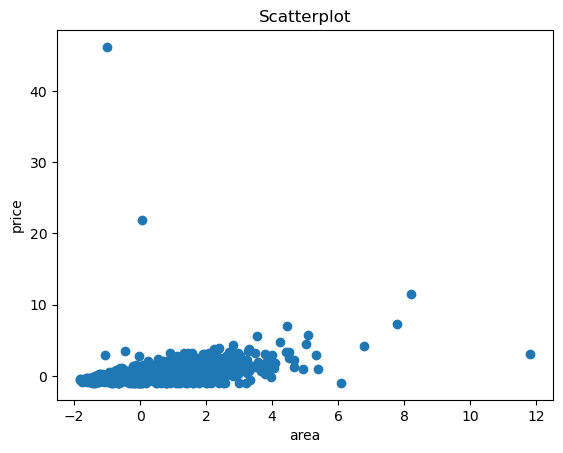

In [5]:
plt.title("Scatterplot")
plt.xlabel("area")
plt.ylabel("price")
plt.scatter(x,y)

In [6]:
x=np.array(x)
y=np.array(y)

In [7]:
def GD(x,y,theta0=1,theta1=2,iterations=100,alpha=0.01):
    m=len(y)
    gd=pd.DataFrame(columns=['theta0','theta1','costfun'])
    for i in range(iterations):
        H0= theta0+(theta1*x)
        costfun=sum([data**2 for data in (H0-y)])/ m
        theta0_der=(1/m) * sum(H0-y)
        theta1_der=(1/m) * sum((H0-y)*x)
        theta0=theta0-(alpha*theta0_der)
        theta1=theta1-(alpha*theta1_der)
        gd.loc[i]=[theta0,theta1,costfun]
    return(gd)

In [8]:
Gradient=GD(x,y)
Gradient

theta0    theta1   costfun
0   0.990000  1.984308  4.277647
1   0.980100  1.968772  4.208743
2   0.970299  1.953392  4.141209
3   0.960596  1.938165  4.075019
4   0.950990  1.923091  4.010146
..       ...       ...       ...
95  0.381047  1.028624  1.327760
96  0.377237  1.022643  1.317549
97  0.373464  1.016722  1.307541
98  0.369730  1.010860  1.297733
99  0.366032  1.005057  1.288119

[100 rows x 3 columns]

<AxesSubplot:xlabel='index'>

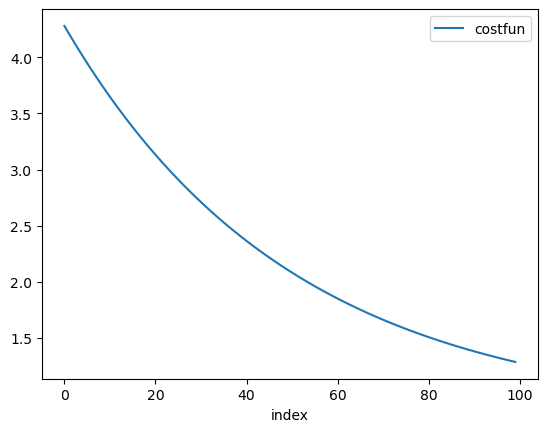

In [9]:
Gradient.reset_index().plot.line(x='index',y=['costfun'])

In [10]:
#Datadet-2

In [11]:
salary=pd.read_csv("SalaryData.csv")
salary.head()

YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891

In [12]:
x1=salary["YearsExperience"]
y1=salary["Salary"]

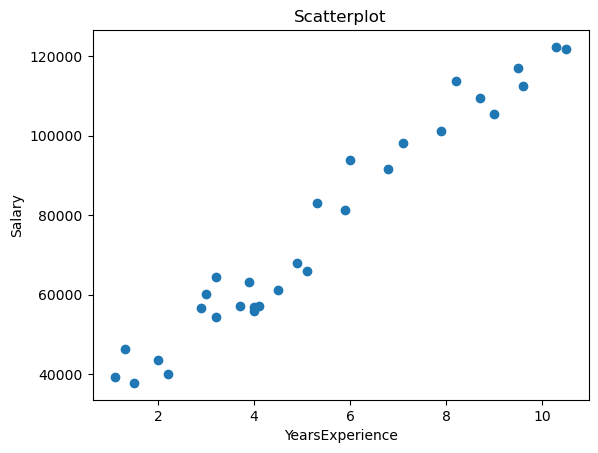

In [13]:
plt.title("Scatterplot")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.scatter(x1,y1)

In [14]:
x1=np.array(x1)
y1=np.array(y1)

In [15]:
def GD1(x1,y1,thetaa0=3,thetaa1=5,iterations=100,alpha=0.01):
    m1=len(y1)
    gd1=pd.DataFrame(columns=['thetaa0','thetaa1','costfunn'])
    for i in range(iterations):
        Hh0= thetaa0+(thetaa1*x1)
        costfunn=sum([data**2 for data in (Hh0-y1)])/ m1
        thetaa0_der=(1/m1) * sum(Hh0-y1)
        thetaa1_der=(1/m1) * sum((Hh0-y1)*x1)
        thetaa0=thetaa0-(alpha*thetaa0_der)
        thetaa1=thetaa1-(alpha*thetaa1_der)
        gd1.loc[i]=[thetaa0,thetaa1,costfunn]
    return(gd1)

In [16]:
Gradient1=GD1(x,y)
Gradient1

thetaa0   thetaa1   costfunn
0   2.970000  4.954314  30.691183
1   2.940300  4.909085  30.096729
2   2.910897  4.864308  29.514102
3   2.881788  4.819978  28.943067
4   2.852970  4.776092  28.383395
..       ...       ...        ...
95  1.143141  2.172006   5.241931
96  1.131710  2.154594   5.153840
97  1.120393  2.137356   5.067502
98  1.109189  2.120290   4.982881
99  1.098097  2.103395   4.899944

[100 rows x 3 columns]

<AxesSubplot:xlabel='index'>

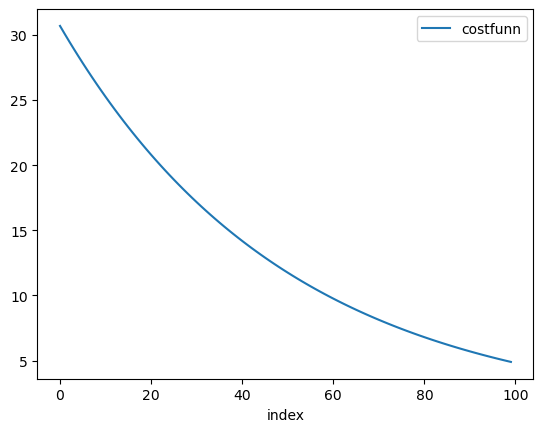

In [17]:
Gradient1.reset_index().plot.line(x='index',y=['costfunn'])